## End-to-End Pipeline for Machine Learning: Classification

In [1]:
# foundational modules
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt 
import matplotlib.figure as fig 
import seaborn as sns
sns.set(style="darkgrid")

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

from nltk.corpus import stopwords
nltk.download("stopwords")

import string

# data preparation for model learning
from sklearn.model_selection import train_test_split

# model building
from sklearn.linear_model import LogisticRegression

# model building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### classification metrics
from sklearn.metrics import classification_report

def _syllables(word):
    syllable_count = 0
    vowels = 'aeiouy'
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllable_count += 1
    if word.endswith('e'):
        syllable_count -= 1
    if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
        syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    return syllable_count

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\audre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\audre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Step-1: Load and Examine the Data Set

In [2]:
df = pd.read_csv("data_to_train.csv")
df.head()

,word_count,char_count,sly_count,level
0,64,567,182,3
1,11,85,27,2
2,9,63,22,2
3,5,44,16,3
4,12,94,32,2


In [3]:
df.shape

(2300, 4)

In [4]:
df.describe()

,word_count,char_count,sly_count,level
count,2300.000000,2300.000000,2300.000000,2300.000000
mean,9.480435,63.553478,19.816087,1.503043
std,7.672735,58.289368,18.045918,0.540238
min,1.000000,1.000000,1.000000,1.000000
25%,3.750000,20.000000,6.000000,1.000000
50%,8.000000,54.000000,17.000000,1.000000
75%,14.000000,94.000000,29.000000,2.000000
max,126.000000,1198.000000,353.000000,3.000000


### Step-2: Split Data into Train, Validation, and Test Data Sets

In [5]:
y = np.array ( df.level)
X = np.array ( df.drop ( columns = ['level'] ) )

def stratified_split(X, y, 
                     test_size=0.2, 
                     validate_size=0.2, 
                     random_state=0):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=test_size, random_state = random_state)

    # need to calculate new split size. 
    # let's assume we had 100 samples and we don't do this
    # then the split will be 20 + (20% of 80) + (80% of 80). 
    # But we want 20 + 20 + 60
    new_validate_size = validate_size / (1 - test_size)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, stratify=y_train, 
        test_size=new_validate_size, 
        random_state = random_state)

    return X_train, X_test, X_val, y_train, y_test, y_val

In [6]:
# Split data into training, validation, and testing data sets
X_train, X_test, X_val, y_train, y_test, y_val = stratified_split (
    X, y, random_state = 66)

In [7]:
# Examine the split proportions 

print ("Training (X_train and y_train): \t", X_train.shape, " \t", y_train.shape)
print ("Validation (X_val and y_val): \t\t", X_val.shape, " \t", y_val.shape)
print ("Testing (X_test and y_test): \t\t", X_test.shape, "  \t", y_test.shape)

Training (X_train and y_train): 	 (1380, 3)  	 (1380,)
Validation (X_val and y_val): 		 (460, 3)  	 (460,)
Testing (X_test and y_test): 		 (460, 3)   	 (460,)


### Step-3: Define the Parameters for Single Model Classifiers and Fit the Model

In [8]:
# Set-up and Build SVM classifier model
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [9]:
# Set-up and Build Decision Tree classifier model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# Set-up and Build Logistic Regression model
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [11]:
# Set-up and Build Gaussian NB model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [12]:
# Set-up and Build k-Nearest Neighbor model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Step-4: Report Performance Metrics for the Training, Validation and Test Data

In [13]:
# SVM model performance
n_sv = np.sum(svc.n_support_)

print("SVM Performance:")
print ("\tTRAIN Accuracy: {:.2f}".format(svc.score(X_train, y_train)))
print ("\tVALIDATION Accuracy: {:.2f}".format(svc.score(X_val, y_val)))
print ("\tSupport Vectors: {:.0f}% out of all the training points".format(100 * n_sv / X_train.shape[0]))
print ("\tTEST Accuracy: {:.2f}".format(svc.score(X_test, y_test)))

SVM Performance:
	TRAIN Accuracy: 0.99
	VALIDATION Accuracy: 0.93
	Support Vectors: 54% out of all the training points
	TEST Accuracy: 0.93


In [116]:
# Logistic Regression model performance
print("Logistic Regression Performance:")
print ("\tTRAIN Accuracy: {:.2f}".format(lr.score(X_train, y_train)))
print ("\tVALIDATION Accuracy: {:.2f}".format(lr.score(X_val, y_val)))
print ("\tTEST Accuracy: {:.2f}".format(lr.score(X_test, y_test)))

Logistic Regression Performance:
	TRAIN Accuracy: 0.96
	VALIDATION Accuracy: 0.94
	TEST Accuracy: 0.96


In [117]:
# Naive Bayes Classifier model performance
print("Naive Bayes Performance:")
print ("\tTRAIN Accuracy: {:.2f}".format(nb.score(X_train, y_train)))
print ("\tVALIDATION Accuracy: {:.2f}".format(nb.score(X_val, y_val)))
print ("\tTEST Accuracy: {:.2f}".format(nb.score(X_test, y_test)))

Naive Bayes Performance:
	TRAIN Accuracy: 0.73
	VALIDATION Accuracy: 0.75
	TEST Accuracy: 0.74


In [118]:
# k-Nearest Neighbor Classifier model performance
print("KNN Performance:")
print ("\tTRAIN Accuracy: {:.2f}".format(knn.score(X_train, y_train)))
print ("\tVALIDATION Accuracy: {:.2f}".format(knn.score(X_val, y_val)))
print ("\tTEST Accuracy: {:.2f}".format(knn.score(X_test, y_test)))

KNN Performance:
	TRAIN Accuracy: 0.94
	VALIDATION Accuracy: 0.91
	TEST Accuracy: 0.92


In [119]:
# Decision Tree model performance
print("Decision Tree Performance:")
print ("\tTRAIN Accuracy: {:.2f}".format(dt.score(X_train, y_train)))
print ("\tVALIDATION Accuracy: {:.2f}".format(dt.score(X_val, y_val)))
print ("\tTEST Accuracy: {:.2f}".format(dt.score(X_test, y_test)))

Decision Tree Performance:
	TRAIN Accuracy: 1.00
	VALIDATION Accuracy: 0.99
	TEST Accuracy: 0.99


### Step-5: Play with Different Parameters to Improve each Model

In [120]:
# Linear SVM model
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [121]:
print("Linear SVM Performance:")
print ("\tTRAIN Accuracy: {:.2f}".format(svc.score(X_train, y_train)))
print ("\tVALIDATION Accuracy: {:.2f}".format(svc.score(X_val, y_val)))
print ("\tTEST Accuracy: {:.2f}".format(svc.score(X_test, y_test)))

Linear SVM Performance:
	TRAIN Accuracy: 0.97
	VALIDATION Accuracy: 0.97
	TEST Accuracy: 0.97


In [122]:
# k-NN Classifier with k=3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("KNN Performance:")
print ("\tTRAIN Accuracy: {:.2f}".format(knn.score(X_train, y_train)))
print ("\tVALIDATION Accuracy: {:.2f}".format(knn.score(X_val, y_val)))
print ("\tTEST Accuracy: {:.2f}".format(knn.score(X_test, y_test)))

KNN Performance:
	TRAIN Accuracy: 0.96
	VALIDATION Accuracy: 0.93
	TEST Accuracy: 0.93


In [123]:
# Examine Feature Importance
feature_names = df.drop ( columns = ['level']).columns
fdf = pd.DataFrame(data = list(zip(feature_names, dt.feature_importances_)), 
                   columns = ["Feature Names", "Feature Importances"])
fdf.head(3)

,Feature Names,Feature Importances
0,word_count,0.346462
1,char_count,0.017251
2,sly_count,0.636288


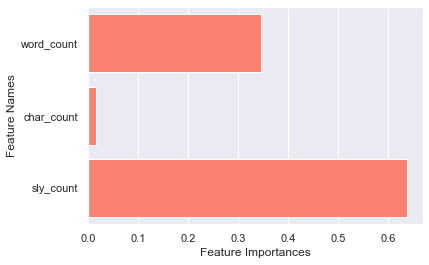

In [124]:
sns.barplot(y = "Feature Names", x="Feature Importances", data = fdf,
           color="salmon", saturation=1.0)
plt.show()

### Select the Best Model

In [125]:
SVM_predictionsValidate = svc.predict(X_val)
print (classification_report(y_val, SVM_predictionsValidate))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       238
           2       0.97      0.97      0.97       212
           3       1.00      0.60      0.75        10

    accuracy                           0.97       460
   macro avg       0.98      0.85      0.90       460
weighted avg       0.97      0.97      0.97       460



In [126]:
LR_predictionsValidate = lr.predict(X_val)
print (classification_report(y_val, LR_predictionsValidate))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97       238
           2       0.95      0.92      0.94       212
           3       0.00      0.00      0.00        10

    accuracy                           0.94       460
   macro avg       0.63      0.64      0.64       460
weighted avg       0.92      0.94      0.93       460



C:\Users\babill\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [127]:
NB_predictionsValidate = nb.predict(X_val)
print (classification_report(y_val, NB_predictionsValidate))

              precision    recall  f1-score   support

           1       0.74      0.87      0.80       238
           2       0.79      0.65      0.71       212
           3       0.14      0.10      0.12        10

    accuracy                           0.75       460
   macro avg       0.56      0.54      0.54       460
weighted avg       0.75      0.75      0.74       460



In [128]:
KNN_predictionsValidate = knn.predict(X_val)
print (classification_report(y_val, KNN_predictionsValidate))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94       238
           2       0.91      0.94      0.93       212
           3       1.00      0.40      0.57        10

    accuracy                           0.93       460
   macro avg       0.95      0.76      0.81       460
weighted avg       0.93      0.93      0.93       460



In [129]:
DT_predictionsValidate = dt.predict(X_val)
print (classification_report(y_val, DT_predictionsValidate))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       238
           2       0.98      1.00      0.99       212
           3       1.00      0.60      0.75        10

    accuracy                           0.99       460
   macro avg       0.99      0.87      0.91       460
weighted avg       0.99      0.99      0.99       460



### Step-6: Predict the Level of Complexity of a Given Sentence

In [130]:
user = """I love running."""
user_string = user.translate(str.maketrans('', '', string.punctuation))
sent_tokenize(user_string)
user_words = word_tokenize(user_string)
user_list = [word for word in user_words if not word in stopwords.words()]
user_word_count = len(user_list)
user_char_count = 0
for word in user_list:
    user_char_count = user_char_count + len(word)
user_sly_count = 0
for word in user_list:
    user_sly_count = user_sly_count + _syllables(word)
user_data = [[user_word_count, user_char_count,user_sly_count]]
X = pd.DataFrame(user_data, columns = ['word_count', 'char_count', 'sly_count'])

In [131]:
MyPrediction = svc.predict(X)
MyPrediction[0]

1